In [1]:
#Load all the libraries you may need!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

#graphics printed in-line
%matplotlib inline

## Problem 1

1. Write a function called even_odd that takes in an integer and returns "even" if the value is even and "odd" if the value is odd. Test your function on at least one even and one odd number. 

## Problem 2

1. Write a function called "rollDie" that randomly rolls n dice (n is the input). The function should output a list of all the dice rolls. Hint: look up the function numpy.random.randint( ).  

2. Then, use this function in a for-loop to roll 2 die 100 times and record the sum of the rolls each time (record the sums in a python list called "dice"). Hint: you can initialize an empty list using dice = \[ \] and then use .append( ) to append values to the list.    

3. Print a histogram of the resulting "dice" list. Add a title and axis labels to make it look nice.  

4. Print the number of times that the sum of the die rolls was greater than 4 and less than 10.  

5. Create a new vector called "wins_and_losses" that is equal to 1 for every value in "dice" that is greater than 8, and 0 otherwise.  

6. Print the first 10 values of both "wins_and_losses" and "dice" to make sure your code worked.  

7. Print the probability of a "win" (you win this game if the sum of your dice is greater than 8). 


## Problem 3

1. Load the run10.csv file and save it as a pandas DataFrame object called "run10". Print the first 5 rows of the data  

2. Print average finishing times (variable "time") grouped by gender. 

3. Create a scatter plot of time (y axis) vs age (x axis), color coded by gender. Include a legend.  

4. Run a linear regression: time = age + gender + age*gender and print the results (optional: add the regression lines to your plot from 3). 

# Answers  

## 1 

In [6]:
def even_odd(N):
    if(N % 2 == 0):
        return "even"
    else:
        return "odd"
    
print(even_odd(3))
print(even_odd(4))

odd
even


## 2

In [21]:
def rollDie(n):
    return np.random.randint(1,7,size=n)

np.random.seed(123)

dice = []

for i in range(100):
    dice.append(rollDie(2).sum( ))

Text(0.5, 1.0, 'Histogram of the Sum of 2 Die')

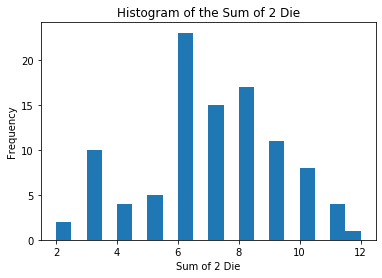

In [24]:
plt.hist(dice, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Sum of 2 Die')
plt.title("Histogram of the Sum of 2 Die")

In [47]:
#greater than 4 and less than 10
print(len([i for i in dice if (i > 4 and i < 10)]))

#or, using a numpy array
dice_numpy = np.array(dice)
print(((dice_numpy > 4) & (dice_numpy < 10)).sum())

71
71


In [74]:
wins_and_losses = [(1 if value > 8 else 0) for value in dice]
print(wins_and_losses[0:5])

#or using numpy arrays
wins_and_losses2 = np.array([0]*100)
wins_and_losses2[dice_numpy > 8] = 1
print(wins_and_losses2[0:5])

[1, 0, 0, 0, 0]
[1 0 0 0 0]


In [76]:
print(dice[0:10])
print(wins_and_losses[0:10])

[9, 8, 6, 7, 4, 3, 3, 3, 10, 6]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [81]:
#with lists
print(sum(wins_and_losses)/100)

#with numpy arrays
print(wins_and_losses2.sum()/100)

0.24
0.24


## 3

In [83]:
run10 = pd.read_csv('run10.csv')

In [85]:
run10.head()

,time,age,gender,state
0,88.31,59,M,MD
1,100.67,32,M,VA
2,109.52,33,F,VA
3,87.11,52,M,PA
4,73.02,40,M,DC


In [87]:
run10.loc[:,('gender','time')].groupby('gender').mean()

,time
gender,
F,102.134909
M,87.645333


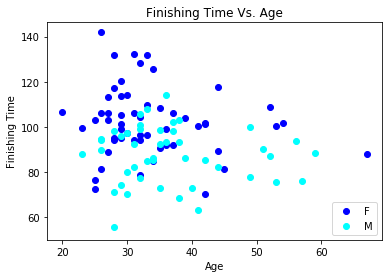

In [95]:
genders = list(set(run10['gender']))
colors = ["blue", "aqua"]
for i, gender in enumerate(genders): 
    data = run10[(run10.gender == gender)]
    plt.scatter(data['age'], data['time'], color = colors[i])
plt.ylabel('Finishing Time')
plt.xlabel('Age')
plt.title("Finishing Time Vs. Age")
plt.legend(genders, loc='lower right')

In [97]:
y, X = patsy.dmatrices('time ~ age + gender + age:gender', run10)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     9.223
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           2.03e-05
Time:                        17:41:54   Log-Likelihood:                -404.58
No. Observations:                 100   AIC:                             817.2
Df Residuals:                      96   BIC:                             827.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         110.9581      7.654     

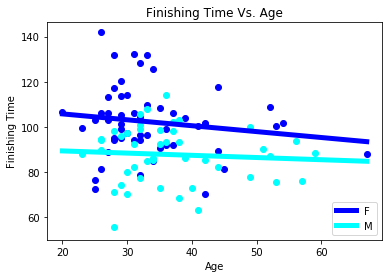

In [98]:
minmage = min(run10["age"])
maxmage = max(run10["age"])
xs = np.linspace(minmage, maxmage, 1000)

genders = list(set(run10['gender']))
colors = ["blue", "aqua"]
for i, gender in enumerate(genders): 
    data = run10[(run10.gender == gender)]
    plt.scatter(data['age'], data['time'], color = colors[i])
plt.plot(xs, 
         results.params[0]+results.params[2]*xs, 
         color='blue',
         linewidth=5)
plt.plot(xs, 
         results.params[0:2].sum()+results.params[2:4].sum()*xs, 
         color='aqua',
         linewidth=5)
plt.ylabel('Finishing Time')
plt.xlabel('Age')
plt.title("Finishing Time Vs. Age")
plt.legend(genders, loc='lower right')